Importar librerias.

In [2]:
import yfinance as yf #Obtener el registro del mercado.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm
import statsmodels.api as sm
import seaborn as sns
import requests #Solicitud de lenguaje HTTP.
from datetime import datetime

Obtener el registro de las empresas de S&P 500.

In [3]:
#Descargar la información de las empresas que hacen parte de Standard and Poor's 500, de la página de Wikipedia.
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
headers = {"User-agent": 'Mozilla/102.9'}
r = requests.get(url, headers=headers)
tables = pd.read_html(r.content, encoding = 'utf8')
table = pd.read_html(r.text, match='Information')
print(f'Total de tablas para trabajar: {len(table)}')
PyS = pd.DataFrame(table[0])
PyS.head()

Total de tablas para trabajar: 1


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


Analizar el porcentaje de los sectores que conforman P&S500.

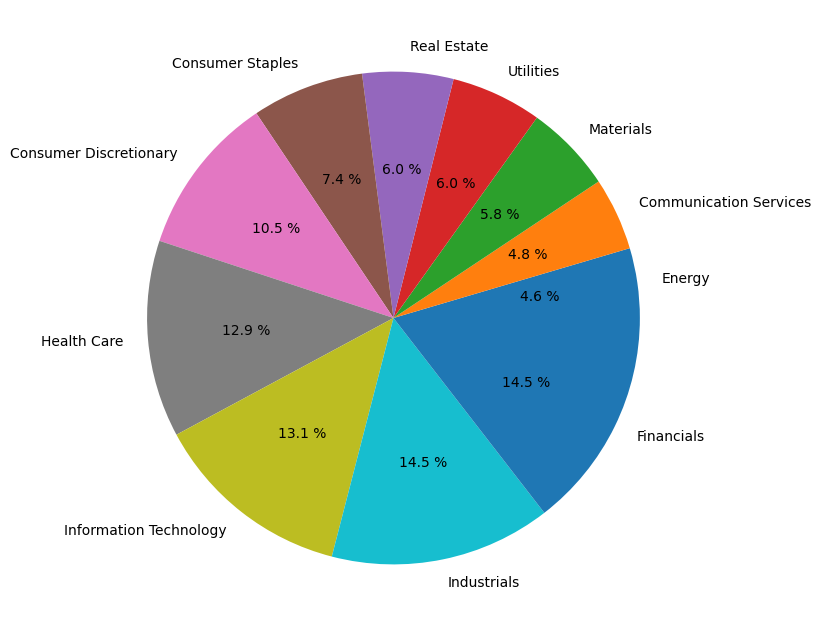

In [4]:
count_sectors = PyS['GICS Sector'].value_counts(ascending = True) #Contar la cantidad de sectores.
plt.rcParams['figure.figsize'] = 8, 8
plt.pie(count_sectors.values, labels = count_sectors.index, autopct= '%0.1f %%') #Vemos la proporción de los sectores que conforman S&P500, lo que nos dara un acercamiento a nuestro objetivo. 
plt.show()

Identificar los sectores que hacen parte de S&P 500, para poder analizar individualmente.

In [5]:
sectors = [i for i in PyS['GICS Sector'].unique()] #Segmentar las empresas por sector.
abb = ['XLI', 'XLV', 'XLK', 'XLC', 'XLP', 'XLY', 'XLU', 'XLF', 'XLB', 'XLRE', 'XLE'] #Obtener la información por medio de las abreviaturas.

In [6]:
dicc_abb = {sec: ab for sec, ab in zip (sectors, abb)}
dicc_abb #Crear diccionario para tener claro cada sector.

{'Industrials': 'XLI',
 'Health Care': 'XLV',
 'Information Technology': 'XLK',
 'Communication Services': 'XLC',
 'Consumer Staples': 'XLP',
 'Consumer Discretionary': 'XLY',
 'Utilities': 'XLU',
 'Financials': 'XLF',
 'Materials': 'XLB',
 'Real Estate': 'XLRE',
 'Energy': 'XLE'}

Obtener los registros de los sectores.

In [7]:
info = [i for i in dicc_abb.values()] #Crear una lista indexada para descargar la información de cada sector.

In [8]:
for ind, ele in enumerate(info):
    info[ind] = yf.download(ele, start= '2000-01-01', end = '2023-03-18') #Establecer los rangos de tiempo para analizar. 
    print(f'Se hizo la descarga del elemento/empresa {ele}, ubicado en la posición {ind}')

[*********************100%***********************]  1 of 1 completed
Se hizo la descarga del elemento/empresa XLI, ubicado en la posición 0
[*********************100%***********************]  1 of 1 completed
Se hizo la descarga del elemento/empresa XLV, ubicado en la posición 1
[*********************100%***********************]  1 of 1 completed
Se hizo la descarga del elemento/empresa XLK, ubicado en la posición 2
[*********************100%***********************]  1 of 1 completed
Se hizo la descarga del elemento/empresa XLC, ubicado en la posición 3
[*********************100%***********************]  1 of 1 completed
Se hizo la descarga del elemento/empresa XLP, ubicado en la posición 4
[*********************100%***********************]  1 of 1 completed
Se hizo la descarga del elemento/empresa XLY, ubicado en la posición 5
[*********************100%***********************]  1 of 1 completed
Se hizo la descarga del elemento/empresa XLU, ubicado en la posición 6
[*******************

In [9]:
for ind, sec in enumerate(dicc_abb.values()): #Verificar los valores de cada sector.
    description = info[ind].info()
    print(f'La información del sector {sec} es: {description}')
    info[ind].reset_index(inplace = True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5839 entries, 2000-01-03 to 2023-03-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5839 non-null   float64
 1   High       5839 non-null   float64
 2   Low        5839 non-null   float64
 3   Close      5839 non-null   float64
 4   Adj Close  5839 non-null   float64
 5   Volume     5839 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 319.3 KB
La información del sector XLI es: None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5839 entries, 2000-01-03 to 2023-03-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5839 non-null   float64
 1   High       5839 non-null   float64
 2   Low        5839 non-null   float64
 3   Close      5839 non-null   float64
 4   Adj Close  5839 non-null   float64
 5   Volume     5839 non-null   int64  
dtypes: float64(5), i

Graficar la correlación entre los valores.

C:\Users\Carlo\AppData\Local\Temp\ipykernel_12444\508172663.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = info[0].corr() #Realizar la operación por cada uno. Verificar que la matriz se comporta de la misma manera para todas.


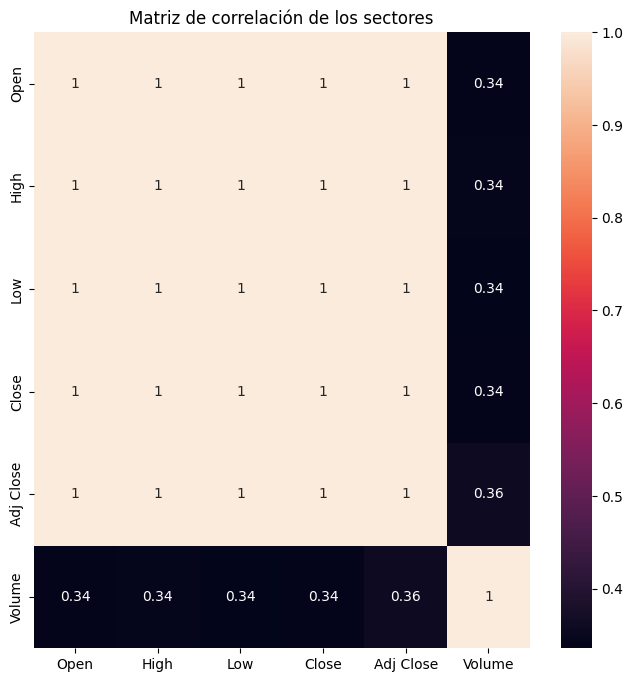

In [10]:
corr = info[0].corr() #Realizar la operación por cada uno. Verificar que la matriz se comporta de la misma manera para todas. 
plt.show()
sns.heatmap(corr, annot= True)
plt.title(f'Matriz de correlación de los sectores');

Graficar los registros de apertura y cierre de los sectores, y verificar cual es el top 2.

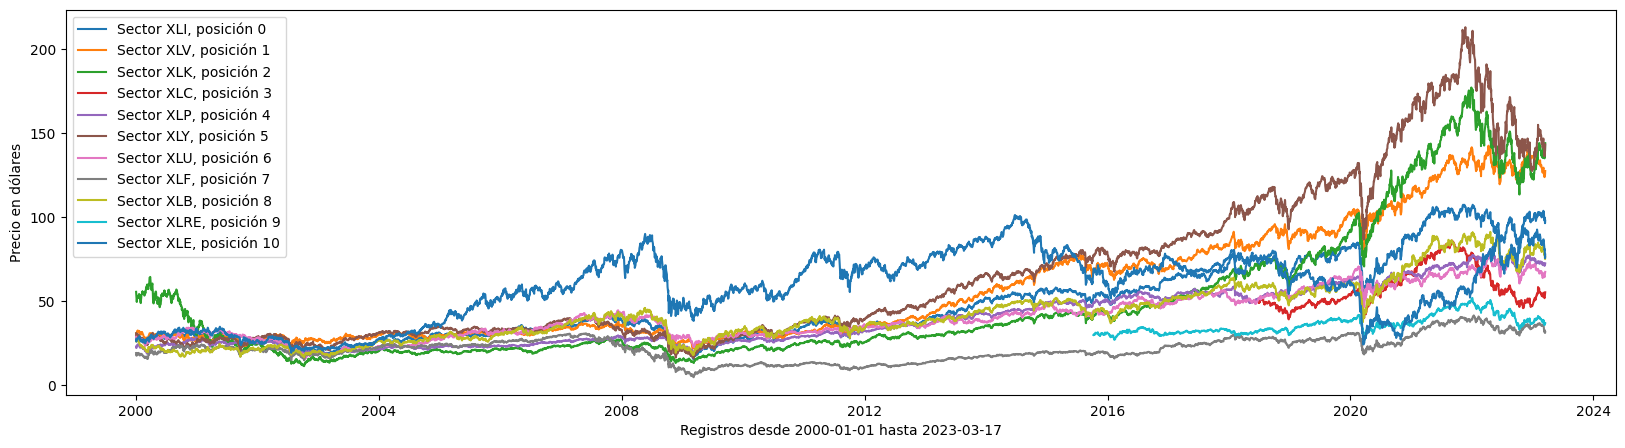

In [11]:
fig, axes = plt.subplots(figsize= (20, 5)) #Graficar los precios de apertura.  
for ind, ele in enumerate(dicc_abb.values()):
    x = info[ind]['Open']
    y = info[ind]['Date']
    plt.plot(y, x, label = f'Sector {ele}, posición {ind}')
    plt.xlabel('Registros desde 2000-01-01 hasta 2023-03-17') #Desde el lunes de la primera semana del año 2000 hasta el viernes de la última semana de marzo de 2023.
    plt.ylabel('Precio en dólares')
    plt.legend()

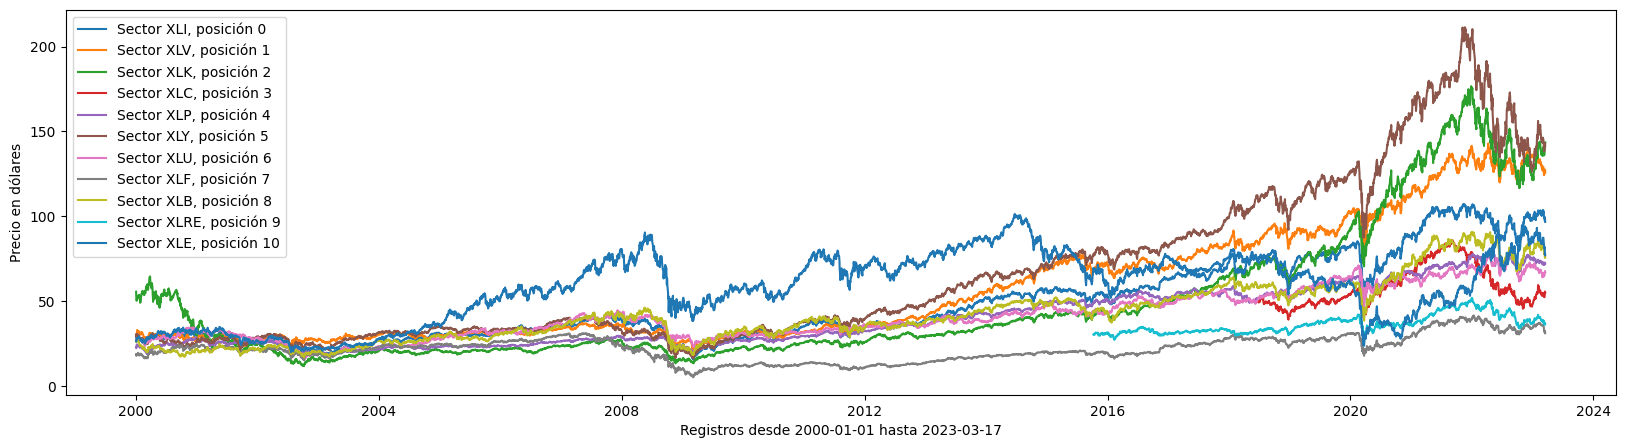

In [12]:
fig, axes = plt.subplots(figsize= (20, 5)) #Graficar los precios de cierre y visualizar que los registros tienen una alta correlación..  
for ind, ele in enumerate(dicc_abb.values()):
    x = info[ind]['Close']
    y = info[ind]['Date']
    plt.plot(y, x, label = f'Sector {ele}, posición {ind}')
    plt.xlabel('Registros desde 2000-01-01 hasta 2023-03-17')
    plt.ylabel('Precio en dólares')
    plt.legend()

Una vez determinado el top 2 de los sectores que conforman S&P500, trabajaremos solo con la información de dichos datos.

Analizar cada dataset.

In [13]:
info[5].head() #Mirar como vienen los registros.

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,31.000000,31.00000,29.859375,30.125000,22.854630,212900
1,2000-01-04,29.687500,29.81250,29.031250,29.218750,22.167089,177200
2,2000-01-05,29.343750,29.34375,28.718750,28.859375,21.894453,124600
3,2000-01-06,29.046875,29.40625,29.000000,29.187500,22.143406,135800
4,2000-01-07,29.500000,30.56250,29.500000,30.562500,23.186550,70000


In [14]:
info[5].info() #Obtener información de cada columna del dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5839 entries, 0 to 5838
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5839 non-null   datetime64[ns]
 1   Open       5839 non-null   float64       
 2   High       5839 non-null   float64       
 3   Low        5839 non-null   float64       
 4   Close      5839 non-null   float64       
 5   Adj Close  5839 non-null   float64       
 6   Volume     5839 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 319.4 KB


In [15]:
info[5].describe()

,Open,High,Low,Close,Adj Close,Volume
count,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5.839000e+03
mean,64.987499,65.456385,64.468872,64.986666,59.542450,4.298422e+06
std,46.233471,46.593403,45.822219,46.221230,47.351981,3.865363e+06
min,16.049999,16.590000,15.850000,16.110001,13.300921,4.000000e+02
25%,30.500000,30.740000,30.240000,30.455000,24.536072,7.647500e+05
50%,39.610001,39.779999,39.369999,39.610001,33.452450,3.897300e+06
75%,89.350002,89.639999,88.960003,89.344997,84.040245,6.244000e+06
max,212.779999,215.059998,211.059998,211.419998,208.644104,3.247770e+07


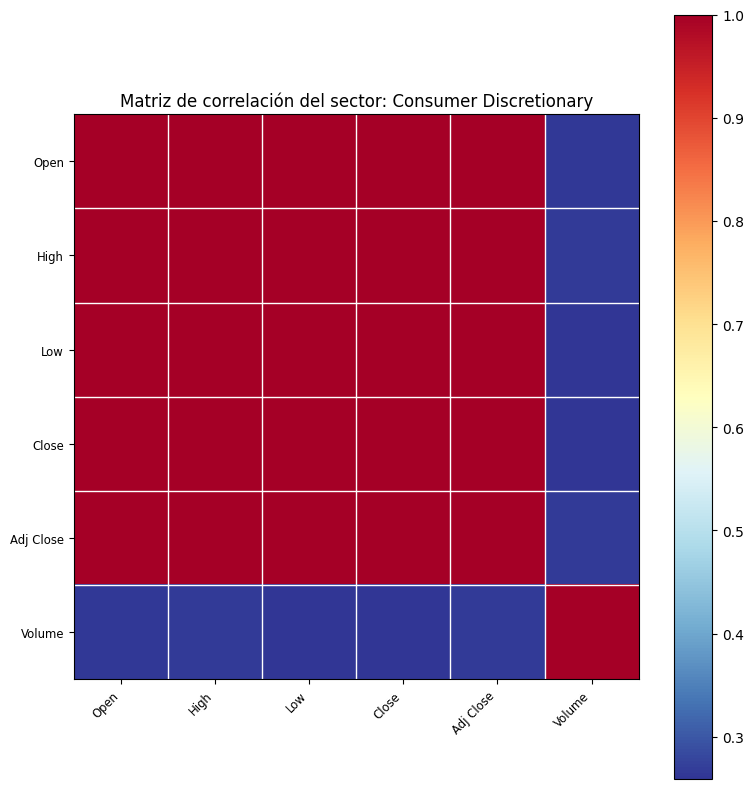

In [16]:
corr = info[5].set_index('Date').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.title(f'Matriz de correlación del sector: {list(dicc_abb)[5]}')
plt.show()

Repetimos operación

In [17]:
info[2].head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,55.625,55.62500,53.5000,55.43750,42.116322,938100
1,2000-01-04,54.000,54.75000,52.3125,52.62500,39.979652,545500
2,2000-01-05,51.750,53.06250,50.1250,51.84375,39.386131,1906000
3,2000-01-06,51.250,52.09375,49.6250,50.12500,38.080387,1670000
4,2000-01-07,49.625,51.00000,49.1250,51.00000,38.745132,686000


In [18]:
info[2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5839 entries, 0 to 5838
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5839 non-null   datetime64[ns]
 1   Open       5839 non-null   float64       
 2   High       5839 non-null   float64       
 3   Low        5839 non-null   float64       
 4   Close      5839 non-null   float64       
 5   Adj Close  5839 non-null   float64       
 6   Volume     5839 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 319.4 KB


In [19]:
info[2].describe()

,Open,High,Low,Close,Adj Close,Volume
count,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5.839000e+03
mean,47.319363,47.716913,46.888530,47.322241,43.074519,7.060534e+06
std,38.307711,38.651112,37.947603,38.328209,39.142459,6.503797e+06
min,11.500000,11.820000,11.400000,11.580000,8.797425,3.940000e+04
25%,21.750000,21.910000,21.570000,21.735000,17.290672,1.482100e+06
50%,29.650000,29.879999,29.389999,29.650000,25.244478,6.279700e+06
75%,56.877501,57.270000,56.325001,56.906250,51.763351,9.859700e+06
max,176.979996,177.039993,175.289993,176.649994,174.546417,6.826950e+07


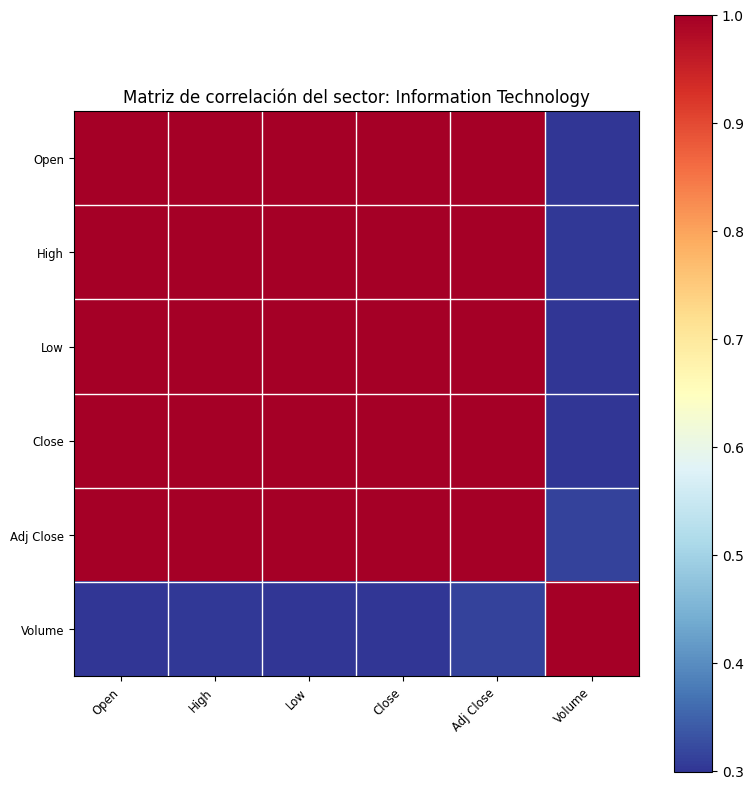

In [20]:
corr = info[2].set_index('Date').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.title(f'Matriz de correlación del sector: {list(dicc_abb)[2]}')
plt.show()

Analizar el precio de apertura y cierre ajustado de cada sector. 

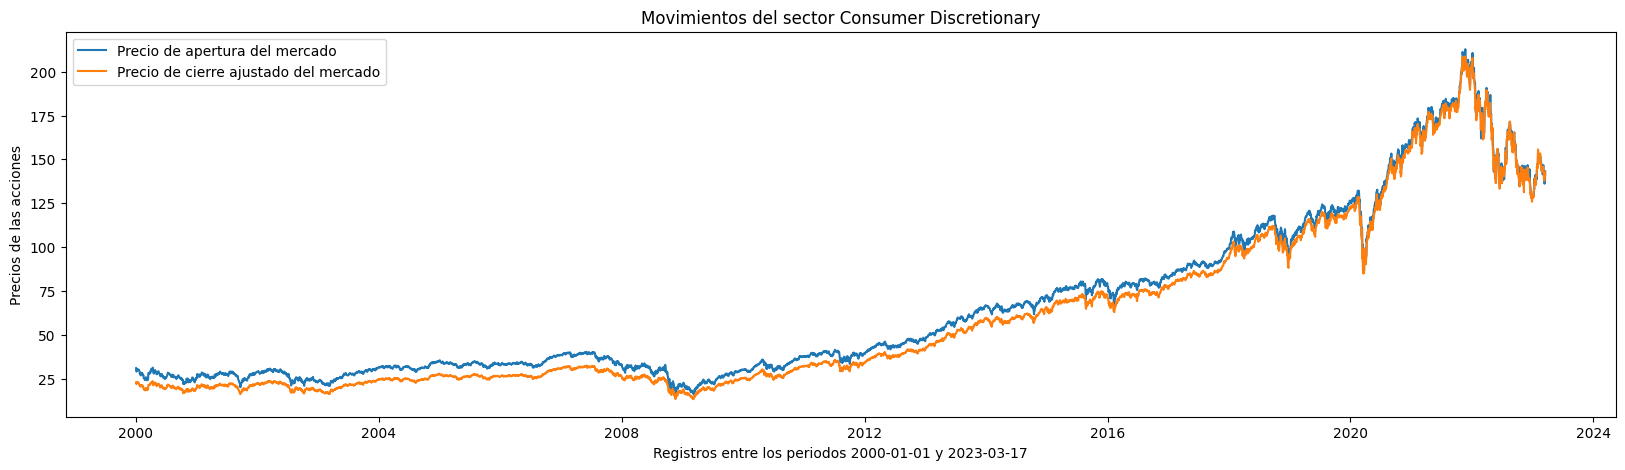

In [21]:
fig, axes = plt.subplots(figsize= (20, 5))

plt.plot(info[5]['Date'], info[5]['Open'], label = 'Precio de apertura del mercado')
plt.plot(info[5]['Date'], info[5]['Adj Close'], label = 'Precio de cierre ajustado del mercado')

plt.title(f'Movimientos del sector {list(dicc_abb)[5]}')
plt.xlabel('Registros entre los periodos 2000-01-01 y 2023-03-17')
plt.ylabel('Precios de las acciones')
plt.legend()
plt.show;

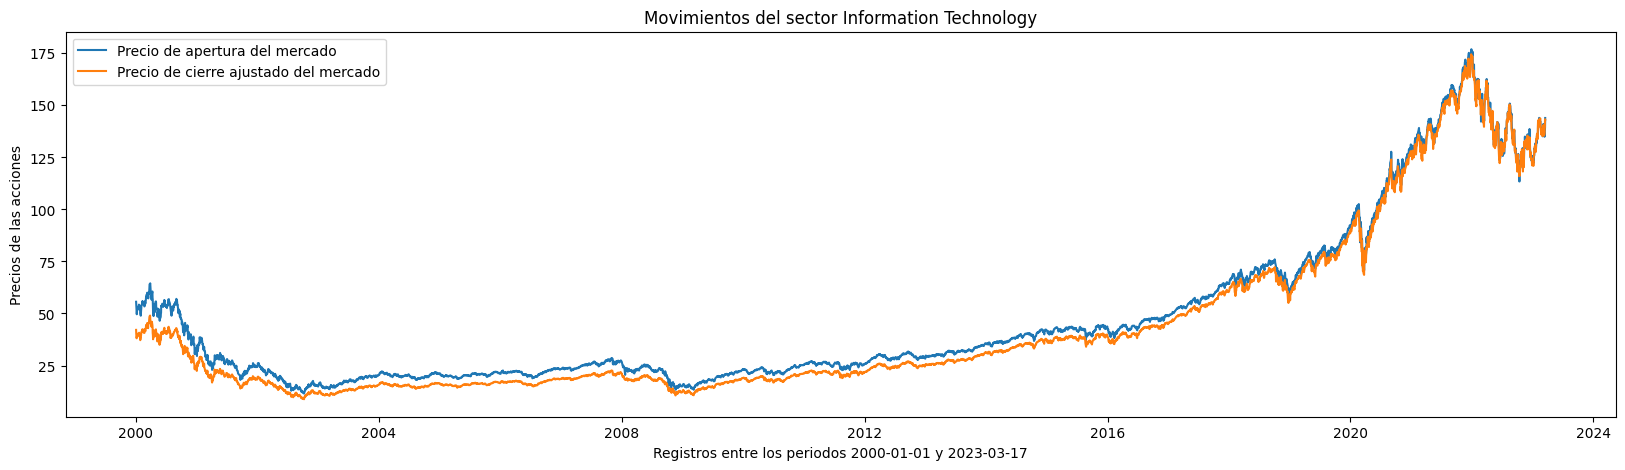

In [22]:
fig, axes = plt.subplots(figsize= (20, 5))

plt.plot(info[2]['Date'], info[2]['Open'], label = 'Precio de apertura del mercado')
plt.plot(info[2]['Date'], info[2]['Adj Close'], label = 'Precio de cierre ajustado del mercado')

plt.title(f'Movimientos del sector {list(dicc_abb)[2]}')
plt.xlabel('Registros entre los periodos 2000-01-01 y 2023-03-17')
plt.ylabel('Precios de las acciones')
plt.legend()
plt.show;

Comparar los precios de apertura y cierre entre los sectores.

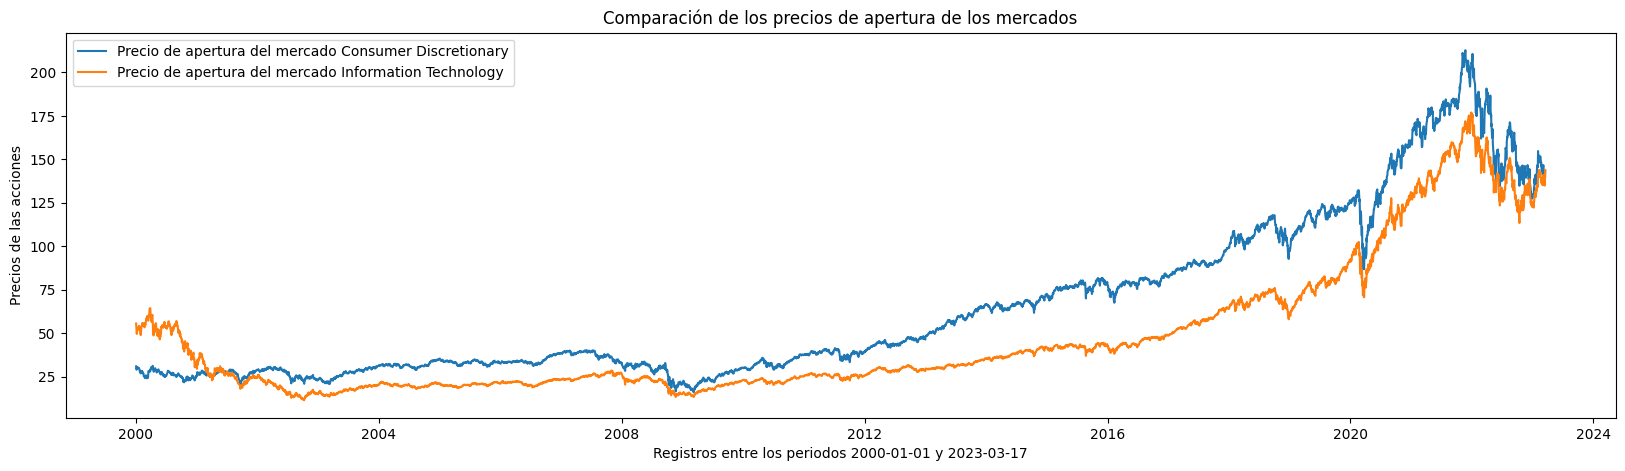

In [23]:
fig, axes = plt.subplots(figsize= (20, 5))

plt.plot(info[5]['Date'], info[5]['Open'], label = f'Precio de apertura del mercado {list(dicc_abb)[5]}')
plt.plot(info[2]['Date'], info[2]['Open'], label = f'Precio de apertura del mercado {list(dicc_abb)[2]}')

plt.title(f'Comparación de los precios de apertura de los mercados')
plt.xlabel('Registros entre los periodos 2000-01-01 y 2023-03-17')
plt.ylabel('Precios de las acciones')
plt.legend()
plt.show;

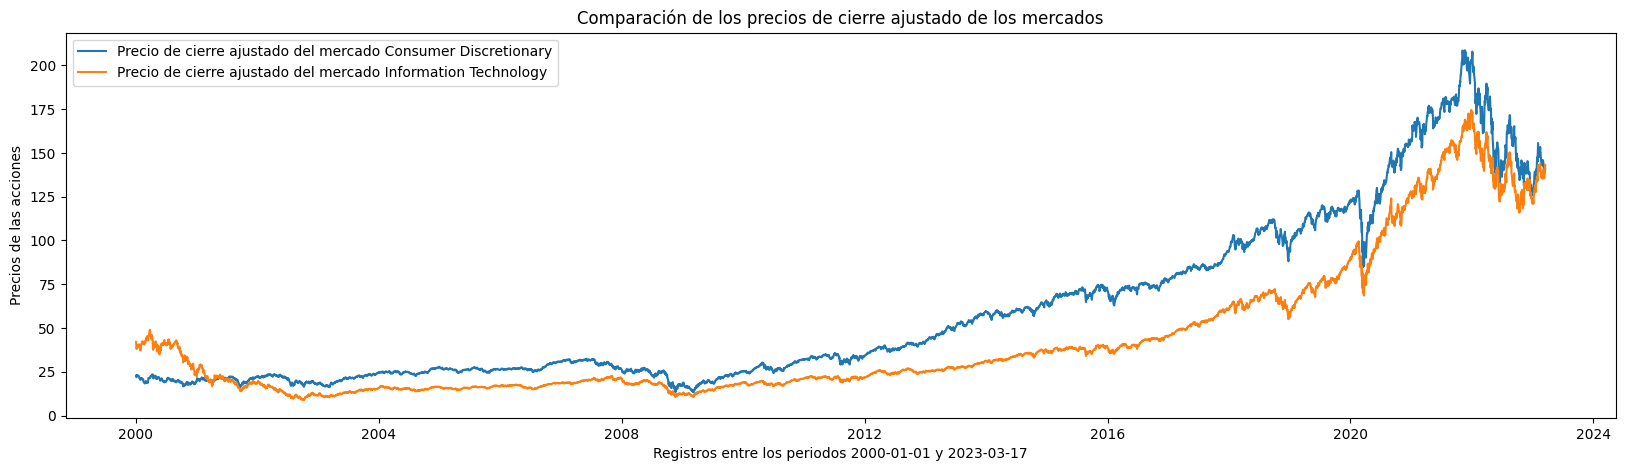

In [24]:
fig, axes = plt.subplots(figsize= (20, 5))

plt.plot(info[5]['Date'], info[5]['Adj Close'], label = f'Precio de cierre ajustado del mercado {list(dicc_abb)[5]}')
plt.plot(info[2]['Date'], info[2]['Adj Close'], label = f'Precio de cierre ajustado del mercado {list(dicc_abb)[2]}')

plt.title(f'Comparación de los precios de cierre ajustado de los mercados')
plt.xlabel('Registros entre los periodos 2000-01-01 y 2023-03-17')
plt.ylabel('Precios de las acciones')
plt.legend()
plt.show;

Crear medias moviles simples en periodos de 30 y 100, para calcular la votalidad respecto al registro. Es decir, en este caso, al cierre del mercado.

In [25]:
MMS30_consumer = pd.DataFrame() 
MMS30_consumer['Close'] = info[5]['Close'].rolling(window = 30).mean() #Hallar la media movil simple en un periodo de 30 días.
MMS30_consumer['Date'] = info[5]['Date']
MMS100_consumer = pd.DataFrame()
MMS100_consumer['Close'] = info[5]['Close'].rolling(window = 100).mean() #Hallar la media movil simple en un periodo de 100 días.
MMS100_consumer['Date'] = info[5]['Date']

In [26]:
MMS30_technology = pd.DataFrame() 
MMS30_technology['Close'] = info[2]['Close'].rolling(window = 30).mean() #Hallar la media movil simple en un periodo de 30 días.
MMS30_technology['Date'] = info[2]['Date']
MMS100_technology = pd.DataFrame()
MMS100_technology['Close'] = info[2]['Close'].rolling(window = 100).mean() #Hallar la media movil simple en un periodo de 100 días.
MMS100_technology['Date'] = info[2]['Date']

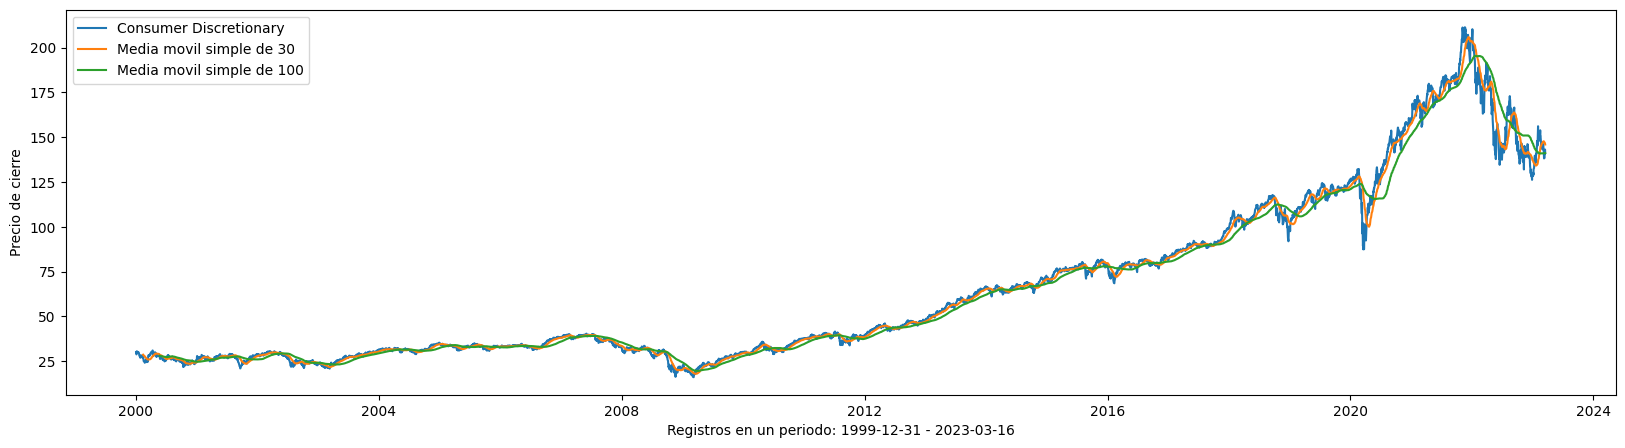

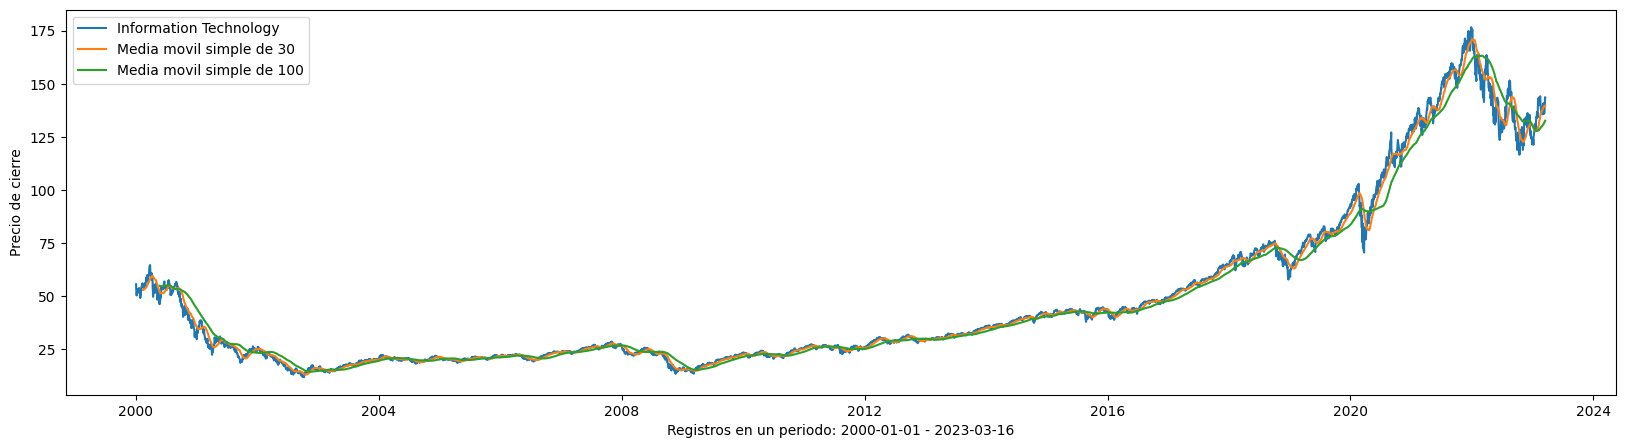

In [27]:
fig, axes = plt.subplots(figsize= (20, 5))

plt.plot(info[5]['Date'], info[5]['Close'], label = list(dicc_abb)[5])
plt.plot(MMS30_consumer['Date'], MMS30_consumer['Close'], label = 'Media movil simple de 30')
plt.plot(MMS100_consumer['Date'], MMS100_consumer['Close'], label = 'Media movil simple de 100')

plt.xlabel('Registros en un periodo: 1999-12-31 - 2023-03-16')
plt.ylabel('Precio de cierre')
plt.legend()
plt.show();

fig, axes = plt.subplots(figsize= (20, 5))

plt.plot(info[2]['Date'], info[2]['Close'], label = list(dicc_abb)[2])
plt.plot(MMS30_technology['Date'], MMS30_technology['Close'], label = 'Media movil simple de 30')
plt.plot(MMS100_technology['Date'], MMS100_technology['Close'], label = 'Media movil simple de 100')

plt.xlabel('Registros en un periodo: 2000-01-01 - 2023-03-16')
plt.ylabel('Precio de cierre')
plt.legend()
plt.show();

Exportar csv del top 5 de los sectores de S&P500 para trabajar en el dashboard. 

In [28]:
dicc_abb

{'Industrials': 'XLI',
 'Health Care': 'XLV',
 'Information Technology': 'XLK',
 'Communication Services': 'XLC',
 'Consumer Staples': 'XLP',
 'Consumer Discretionary': 'XLY',
 'Utilities': 'XLU',
 'Financials': 'XLF',
 'Materials': 'XLB',
 'Real Estate': 'XLRE',
 'Energy': 'XLE'}

In [29]:
PyS.to_csv('../Proyecto2_DA/Datasets_S&P500/S&P500.csv', sep = ';', index = False)
info[0]['Date'].to_csv('../Proyecto2_DA/Datasets_S&P500/Date.csv', sep = ';', index = False)
info[0].to_csv('../Proyecto2_DA/Datasets_S&P500/Industrials.csv', sep = ';', index = False)
info[1].to_csv('../Proyecto2_DA/Datasets_S&P500/Health Care.csv', sep = ';', index = False)
info[2].to_csv('../Proyecto2_DA/Datasets_S&P500/Consumer discretionary.csv', sep = ';', index = False)
info[5].to_csv('../Proyecto2_DA/Datasets_S&P500/Information technology.csv', sep = ';', index = False)
info[7].to_csv('../Proyecto2_DA/Datasets_S&P500/Financials.csv', sep = ';', index = False)